In [4]:
# -*- coding: utf-8 -*-
import math
import numpy as np
import matplotlib.pyplot as plt

um = 10**(-6)
yr = 60*60*24*365
pi = math.pi

w_input = 100
w = w_input*um
y = 0*um

XAn = [ 0.6, 0.7, 0.8, 0.9 ]



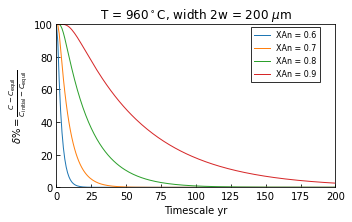

In [5]:
fig = plt.figure(figsize=(5,3)) # Figureオブジェクトを作成
ax = fig.add_subplot(1,1,1) # figに属するAxesオブジェクトを作成

for i in range(len(XAn)):
    TempC = 960
    TempK = TempC + 273

    # 拡散係数
    D_Sr = ( 10**( - ( 4.1*XAn[i] + 4.08 ) ) ) * math.exp( -3.32 * ( 10**4 ) / TempK )
    #D_Mg = math.exp( -6.06 - 7.96 * XAn[i] - 287000 / ( 8.31 * TempK ) )
    D_Mg = ( 2.92 * 10**( - ( 4.1*XAn[i] + 3.1 ) ) ) * math.exp( -266000 / ( 8.31 * TempK ) )

    #delta = ( C - C_equil ) / ( C_initial - C_equil )
    tyr = list(range(500))
    delta = []
    for t in range(len(tyr)):
        calc = 0
        for n in range(0,1000): # ループ数は100回程度だと小数点第一位に誤差を持つので1000回以上推奨
            term1 = (-1)**n / ( ( n + 0.5 ) * pi )
            term2 = math.exp( ( -( n + 0.5 ) ** 2 ) * ( pi**2 ) * D_Mg * t * yr / ( w ** 2 ) )
            term3 = math.cos( ( n + 0.5 ) * ( ( pi * y ) / w ) )
            calc = calc + ( term1 * term2 * term3 )
        delta_calc = 100 * 2 * calc
        delta.append(delta_calc)
    ax.plot(tyr, delta, lw=1, label='XAn = '+str(XAn[i]))

ax.set_title('T = '+str(TempC)+r'$^\circ$C, width 2w = '+str(2*w_input)+r' $\mu$m')
ax.set_xlim(0, 200)
ax.set_ylim(0, 100)
ax.tick_params( direction='in' )
ax.set_xlabel('Timescale yr')
ax.set_ylabel(r'$\delta \% = \frac{C - C_\mathrm{equil}}{C_\mathrm{initial}-C_\mathrm{equil}}$')
fig.legend( edgecolor='k', fancybox=False, bbox_to_anchor=(0.9, 0.92), loc='upper right', fontsize=8)
plt.savefig('pl-diffusion.jpg', bbox_inches="tight", dpi=300)
plt.show()